# Assignment 0: Python, NumPy, Matplotlib
## [Scientific Computing with Python](https://scicompy.yoavram.com/)
## Sahar Millis

# General instructions

1. Questions regarding the exercises should be posted to the course forum at the designated group (i.e. "assignment 0"). You can post questions anonymously. You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. This is assignment should **not** be submitted and will **not** be graded.
1. Lines that end with `###`, as well as cells that start with `###`, are unitests for your solutions, don't change them.

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from datetime import date
import string
import pickle

# Exercise 1

The following cell loads a dictionary called **presidents_by_party** (taken from https://github.com/inglesp/python-data-structure-exercises)

The keys of the dictionaries are US political party names, and the values are lists of presidents from each party.
Each president is represented by a dictionary in which the keys are properties, e.g. `name` and `born`, and the values are the property values, e.g. `George Washington` and `date(1732, 2, 22)`. Dates are given using the Python `datetime.date` type.

In [82]:
with open('../data/presidents.obj', 'rb') as f:
    presidents_by_party = pickle.load(f)
presidents_by_party['Independent']

[{'name': 'George Washington',
  'born': datetime.date(1732, 2, 22),
  'took_office': datetime.date(1789, 4, 30),
  'left_office': datetime.date(1797, 3, 4)}]

**Add Donald Trump to the correct party**.

In [83]:
# your code here #

dt = {}
dt['name'] = 'Donald John Trump'
dt['born'] = date(1946,6,14)
dt['took_office'] = date(2017,1,20)
dt['left_office'] = None

presidents_by_party['Republican'].append(dt)
len(presidents_by_party['Republican'])



19

In [17]:
len(presidents_by_party['Republican']) ###

19

**Create dictionary called `parties`** with `party_name` as a key and a tuple `(number_of_presidents, last_president_name)` as a value.

Bonus: use a [dictionary comprehension](https://dbader.org/blog/list-dict-set-comprehensions-in-python).

In [84]:
# your code here #

parties = {k : (len(presidents_by_party[k]),presidents_by_party[k][-1]['name']) for k in presidents_by_party.keys()}
parties['Democratic']

(16, 'Barack Obama')

In [26]:
parties['Democratic'] ###

(16, 'Barack Obama')

**Create a list called `presidents`** that contains all the president dictionaries.

In [85]:
# your code here #

# Option1:
presidents = []
for v in presidents_by_party.values():
    presidents.extend(v)
len(presidents)

# Option2:
presidents = []
[presidents.extend(v) for v in presidents_by_party.values()]
len(presidents)

45

In [75]:
len(presidents)

45

**Sort the presidents list** by ascending date of taking office.

In [86]:
# your code here #

presidents.sort(key= lambda p: p['took_office'])
presidents[-1]

{'name': 'Donald John Trump',
 'born': datetime.date(1946, 6, 14),
 'took_office': datetime.date(2017, 1, 20),
 'left_office': None}

In [42]:
presidents[-1]

{'name': 'Donald Trump',
 'born': datetime.date(1946, 6, 14),
 'took_office': datetime.date(2017, 1, 20)}

**Print all the presidents that took office on Jan 20**.

In [104]:
# your code here #
[print(v['name'],v['took_office'].strftime('%d/%m/%y')) for v in presidents if v['took_office'].day==20 and v['took_office'].month==1 ]
pass

Dwight D. Eisenhower 20/01/53
John F. Kennedy 20/01/61
Richard Nixon 20/01/69
Jimmy Carter 20/01/77
Ronald Reagan 20/01/81
George H. W. Bush 20/01/89
Bill Clinton 20/01/93
George W. Bush 20/01/01
Barack Obama 20/01/09
Donald John Trump 20/01/17


Dwight D. Eisenhower 01/20/53
John F. Kennedy 01/20/61
Richard Nixon 01/20/69
Jimmy Carter 01/20/77
Ronald Reagan 01/20/81
George H. W. Bush 01/20/89
Bill Clinton 01/20/93
George W. Bush 01/20/01
Barack Obama 01/20/09
Donald Trump 01/20/17


<br><br><br>
<br><br><br>
<br><br><br>

# Exercise 2

The following cell defines frequencies arrays for the characters of English, Deutch, and French texts.

For example, `en[0]` gives the frequency of `a` in English texts, whereas `de[10]` gives the frequency of `k`. 

We only consider lowercase letters a-z.

In [105]:
en = np.array([0.08167, 0.01492, 0.02782, 0.04253, 0.12702, 0.02228, 0.02015,
            0.06094, 0.06966, 0.00153, 0.00772, 0.04025, 0.02406, 0.06749,
            0.07507, 0.01929, 0.00095, 0.05987, 0.06327, 0.09056, 0.02758,
            0.00978, 0.0236 , 0.0015 , 0.01974, 0.00074])
de = np.array([0.06516, 0.01886, 0.02732, 0.05076, 0.16396, 0.01656, 0.03009,
            0.04577, 0.0655 , 0.00268, 0.01417, 0.03437, 0.02534, 0.09776,
            0.02594, 0.0067 , 0.00018, 0.07003, 0.0727 , 0.06154, 0.04166,
            0.00846, 0.01921, 0.00034, 0.00039, 0.01134])
fr = np.array([0.07636, 0.00901, 0.0326 , 0.03669, 0.14715, 0.01066, 0.00866,
            0.00737, 0.07529, 0.00613, 0.00074, 0.05456, 0.02968, 0.07095,
            0.05796, 0.02521, 0.01362, 0.06693, 0.07948, 0.07244, 0.06311,
            0.01838, 0.00049, 0.00427, 0.00128, 0.00326])

We want to use these frequency arrays to determine the language of a text of our choice.

First, **write a function called `frequencies(text)`** that takes a string and returns the frequency of each letter in the text in a NumPy array, similar to those above. Disregard casing (`A` is the same as `a`) and punctuation.

Apply the function on `../data/Gulliver.txt`, an English book by Jonathan Swift.

**Tip**: use the function `ord`.

In [178]:
# your code here #

def frequencies(text):
    import string
    from collections import Counter 
    
    #remove punctuation
    table = str.maketrans(dict.fromkeys(string.punctuation))
    text = text.translate(table)
    
    #lower case
    lower_text = text.lower()
    
    # count letter in text
    count = Counter(lower_text)
    
    # get count by all 26 letter by alphabetical order
    counts = list({k: count.get(k, 0) for k in string.ascii_lowercase}.values())
    
    # return freq as np.array
    counts = np.array(counts)
    
    return counts/counts.sum()


# open file
with open('../data/Gulliver.txt') as f:
    gulliver = f.read()

# get freq
gulliver_freq = frequencies(gulliver)
print(gulliver_freq)

[0.07731152 0.01604013 0.02737605 0.0436618  0.12616461 0.02458682
 0.01957454 0.0590067  0.06972233 0.00178594 0.00638608 0.03789601
 0.02903709 0.06680405 0.07671621 0.01952875 0.00111153 0.06147538
 0.06039715 0.0929187  0.02851255 0.01014113 0.02228883 0.00185255
 0.01932059 0.000383  ]


In [188]:
###
with open('../data/Gulliver.txt') as f:
    gulliver = f.read()

gulliver_freq = frequencies(gulliver)
print(gulliver_freq)

[0.07731152 0.01604013 0.02737605 0.0436618  0.12616461 0.02458682
 0.01957454 0.0590067  0.06972233 0.00178594 0.00638608 0.03789601
 0.02903709 0.06680405 0.07671621 0.01952875 0.00111153 0.06147538
 0.06039715 0.0929187  0.02851255 0.01014113 0.02228883 0.00185255
 0.01932059 0.000383  ]


**Implement a function called `relative_entropy(p, q)`** to compute the relative entropy of a text frequencies array `q` and a language frequencies array `p` according to the following formula:
$$
re(p, q) = \sum_{i=1}^{n}{p_i \log{\Big(\frac{p_i}{q_i}\Big)}}
$$
where $i=1$ for `a` and $i=n$ for `z`.

Relative entropy is a measure of similarity between two distributions or frequencies: the lower the relative entropy of `p` and `q`, the more similar `p` and `q`.

Reminder: frequency array values are between 0 and 1 and sum to 1.

In [306]:
def relative_entropy(p,q):
    # convert to np.array
    p = np.array(p)
    q = np.array(q)
    
    # remove zeros
    p = p[q!=0]
    q = q[q!=0]
    
    # make sure to sum to one
    # p = p/p.sum(axis=0,keepdims=1) 
    # Note: fr & de not sum to 1
    q = q/q.sum(axis=0,keepdims=1)
    
    return np.sum( p*np.log(p/q) )

print('en', relative_entropy(en, gulliver_freq))
print('fr', relative_entropy(fr, gulliver_freq))
print('de', relative_entropy(de, gulliver_freq))

en 0.0013824140607542703
fr 0.12113178055931938
de 0.08528949658982557


In [305]:
###
print('en', relative_entropy(en, gulliver_freq))
print('fr', relative_entropy(fr, gulliver_freq))
print('de', relative_entropy(de, gulliver_freq))

en 0.0013824140607542703
fr 0.12113178055931938
de 0.08528949658982557


Finally, **write a function called `detect_language(text)`** that takes a text and returns the name of the language most likely for that text, e.g. `en`, `fr`, or `de`.

In [307]:
# your code here #
def detect_language(text):
    freq = frequencies(text)
    return sorted([('en', relative_entropy(en, freq)),('fr', relative_entropy(fr, freq)),('de', relative_entropy(de, freq))],key=lambda l:l[1])[0][0]

print(detect_language(gulliver))

en


In [33]:
print(detect_language(gulliver)) ###

en


In [308]:
ne_me_quitte_pas = """Ne me quitte pas
Il faut oublier
Tout peut s'oublier
Qui s'enfuit déjà
Oublier le temps
Des malentendus
Et le temps perdu
A savoir comment
Oublier ces heures
Qui tuaient parfois
A coups de pourquoi
Le coeur du bonheurNe me quitte pas
Ne me quitte pas
Ne me quitte pas
Ne me quitte pas"""

detect_language(ne_me_quitte_pas)

'fr'

In [35]:
###
ne_me_quitte_pas = """Ne me quitte pas
Il faut oublier
Tout peut s'oublier
Qui s'enfuit déjà
Oublier le temps
Des malentendus
Et le temps perdu
A savoir comment
Oublier ces heures
Qui tuaient parfois
A coups de pourquoi
Le coeur du bonheurNe me quitte pas
Ne me quitte pas
Ne me quitte pas
Ne me quitte pas"""

print(detect_language(ne_me_quitte_pas))

fr


<br><br><br>
<br><br><br>
<br><br><br>


# Exercise 3

The file `../data/stocks.csv` contains a table with 1967 rows and 4 columns that represent the quotes (stock prices) for four corporations -- Amazon, Apple, Facebook, and Microsoft -- over 1,967 days starting from 2012-05-18 and ending at 2020-03-13.

**Load the data using NumPy**.

In [327]:
# your code here #
import numpy as np

data_path = '../data/stocks.csv'
data = np.loadtxt(data_path, delimiter=',')
data


array([[ 213.85  ,   75.7685,   38.2318,   29.27  ],
       [ 218.11  ,   80.1828,   34.03  ,   29.75  ],
       [ 215.33  ,   79.5671,   31.    ,   29.76  ],
       ...,
       [1820.86  ,  275.43  ,  170.24  ,  153.63  ],
       [1676.61  ,  248.23  ,  154.47  ,  139.06  ],
       [1785.    ,  277.97  ,  170.28  ,  158.83  ]])

In [104]:
data ###

array([[ 213.85  ,   75.7685,   38.2318,   29.27  ],
       [ 218.11  ,   80.1828,   34.03  ,   29.75  ],
       [ 215.33  ,   79.5671,   31.    ,   29.76  ],
       ...,
       [1820.86  ,  275.43  ,  170.24  ,  153.63  ],
       [1676.61  ,  248.23  ,  154.47  ,  139.06  ],
       [1785.    ,  277.97  ,  170.28  ,  158.83  ]])

**Re-create the plot** with all four companies on the same axis.

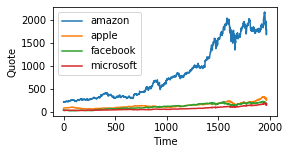

In [381]:
company = ['amazon','apple','facebook','microsoft']

plt.figure(figsize=(4,2))
plt.plot(data)
plt.legend(labels=company)
plt.xlabel('Time')
plt.ylabel('Quote')
plt.show()

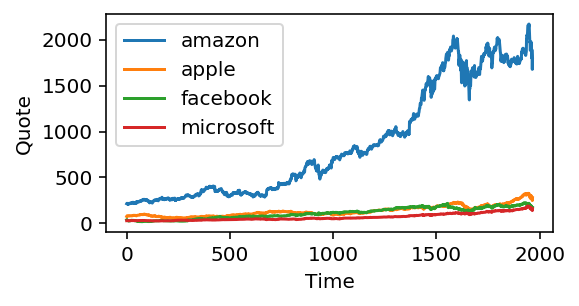

In [109]:
# your code here #

**Re-create the plot** with each company on a different axis.

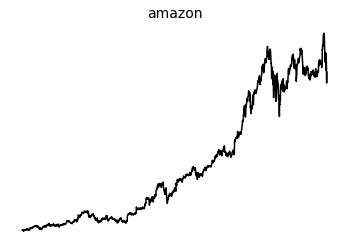

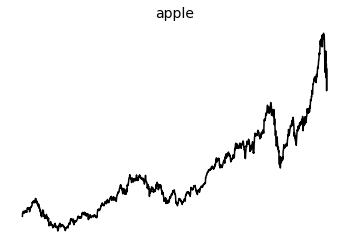

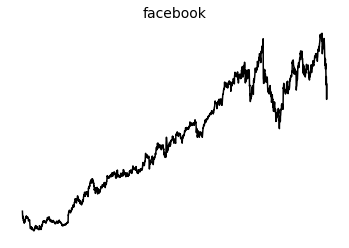

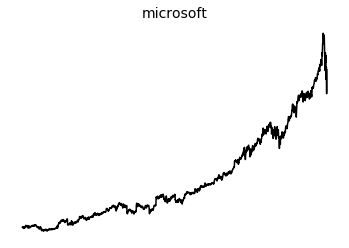

In [389]:
# your code here #
for i in range(4):
    plt.plot(data[:,i],'k')
    plt.title(company[i],fontsize=14)
    plt.axis('off')
    plt.show()
    print('\n\n\n\n\n')

**End of assignment**